In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn import linear_model, ensemble, cross_validation, grid_search
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns


import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

%matplotlib inline

In [5]:
df = pd.read_csv('final_movie.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,movie,year,composer,domestic_total_gross,foreign_total_gross,runtime,worldwide,budget,genre,metascore,oscar,other,rating,top_15
0,0,0,Titanic,1997,James Horner,659363944,1528100000,194,2187463944,200000000,Drama,75.0,1.0,1.0,7.8,1
1,1,1,Men in Black,1997,Danny Elfman,250690539,338700000,97,589390539,90000000,Adventure,71.0,1.0,1.0,7.3,1
2,2,2,The Lost World: Jurassic Park,1997,John Williams,229086679,389552320,129,618638999,73000000,Action,59.0,1.0,1.0,6.5,1
3,3,3,Liar Liar,1997,John Debney,181410615,121300000,86,302710615,45000000,Comedy,70.0,0.0,1.0,6.9,1
4,4,4,Air Force One,1997,Jerry Goldsmith,172956409,142200000,124,315156409,85000000,Action,61.0,0.0,1.0,6.5,1


In [6]:
#drop categorical and divide worldwide & budget by 1M
df = df.drop('composer', axis=1).drop('movie', axis=1).drop('Unnamed: 0', axis=1).drop('Unnamed: 0.1', axis=1)
df.worldwide=df.worldwide/1000000
df.budget=df.budget/1000000
df.head()

,year,domestic_total_gross,foreign_total_gross,runtime,worldwide,budget,genre,metascore,oscar,other,rating,top_15
0,1997,659363944,1528100000,194,2187.463944,200.0,Drama,75.0,1.0,1.0,7.8,1
1,1997,250690539,338700000,97,589.390539,90.0,Adventure,71.0,1.0,1.0,7.3,1
2,1997,229086679,389552320,129,618.638999,73.0,Action,59.0,1.0,1.0,6.5,1
3,1997,181410615,121300000,86,302.710615,45.0,Comedy,70.0,0.0,1.0,6.9,1
4,1997,172956409,142200000,124,315.156409,85.0,Action,61.0,0.0,1.0,6.5,1


In [7]:
#baseline model & OLS regression summary stats for Worldwide Gross prediction
X=df.loc[:,['year', 'runtime', 'budget', 'rating', 'oscar', 'other', 'metascore','top_15']]

y=df['worldwide']


model = sm.OLS(y,sm.add_constant(X))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              worldwide   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     231.3
Date:                Fri, 20 Jul 2018   Prob (F-statistic):          9.39e-281
Time:                        13:39:54   Log-Likelihood:                -13591.
No. Observations:                2085   AIC:                         2.720e+04
Df Residuals:                    2076   BIC:                         2.725e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7553.7375   1195.657     -6.318      0.000   -9898.548   -5208.927
year           3.6525      0.597      6.122      0.000       2.482       4.823
runtime        0.6776      0.208      3.263      0.001       0.270       1.085
budget         2.7038      0.083     32.523      0.000       2.541       2.867
rating        14.9110      6.121      2.436      0.015       2.907      26.915
oscar         55.2047     15.751      3.505      0.000      24.315      86.094
other         14.0954      7.679      1.836      0.067      -0.964      29.155
metascore      1.2369      0.361      3.423      0.001       0.528       1.946
top_15        40.9211      9.082      4.506      0.000      23.110      58.732
==============================================================================
Omnibus:                     1529.127   Durbin-Watson:                   1.293
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47473.680
Skew:                           3.096   Prob(JB):                         0.00
Kurtosis:                      25.541   Cond. No.                     6.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
small=df.loc[:,['year', 'runtime', 'budget', 'metascore', 'oscar', 'other', 'rating','top_15', 'worldwide']]

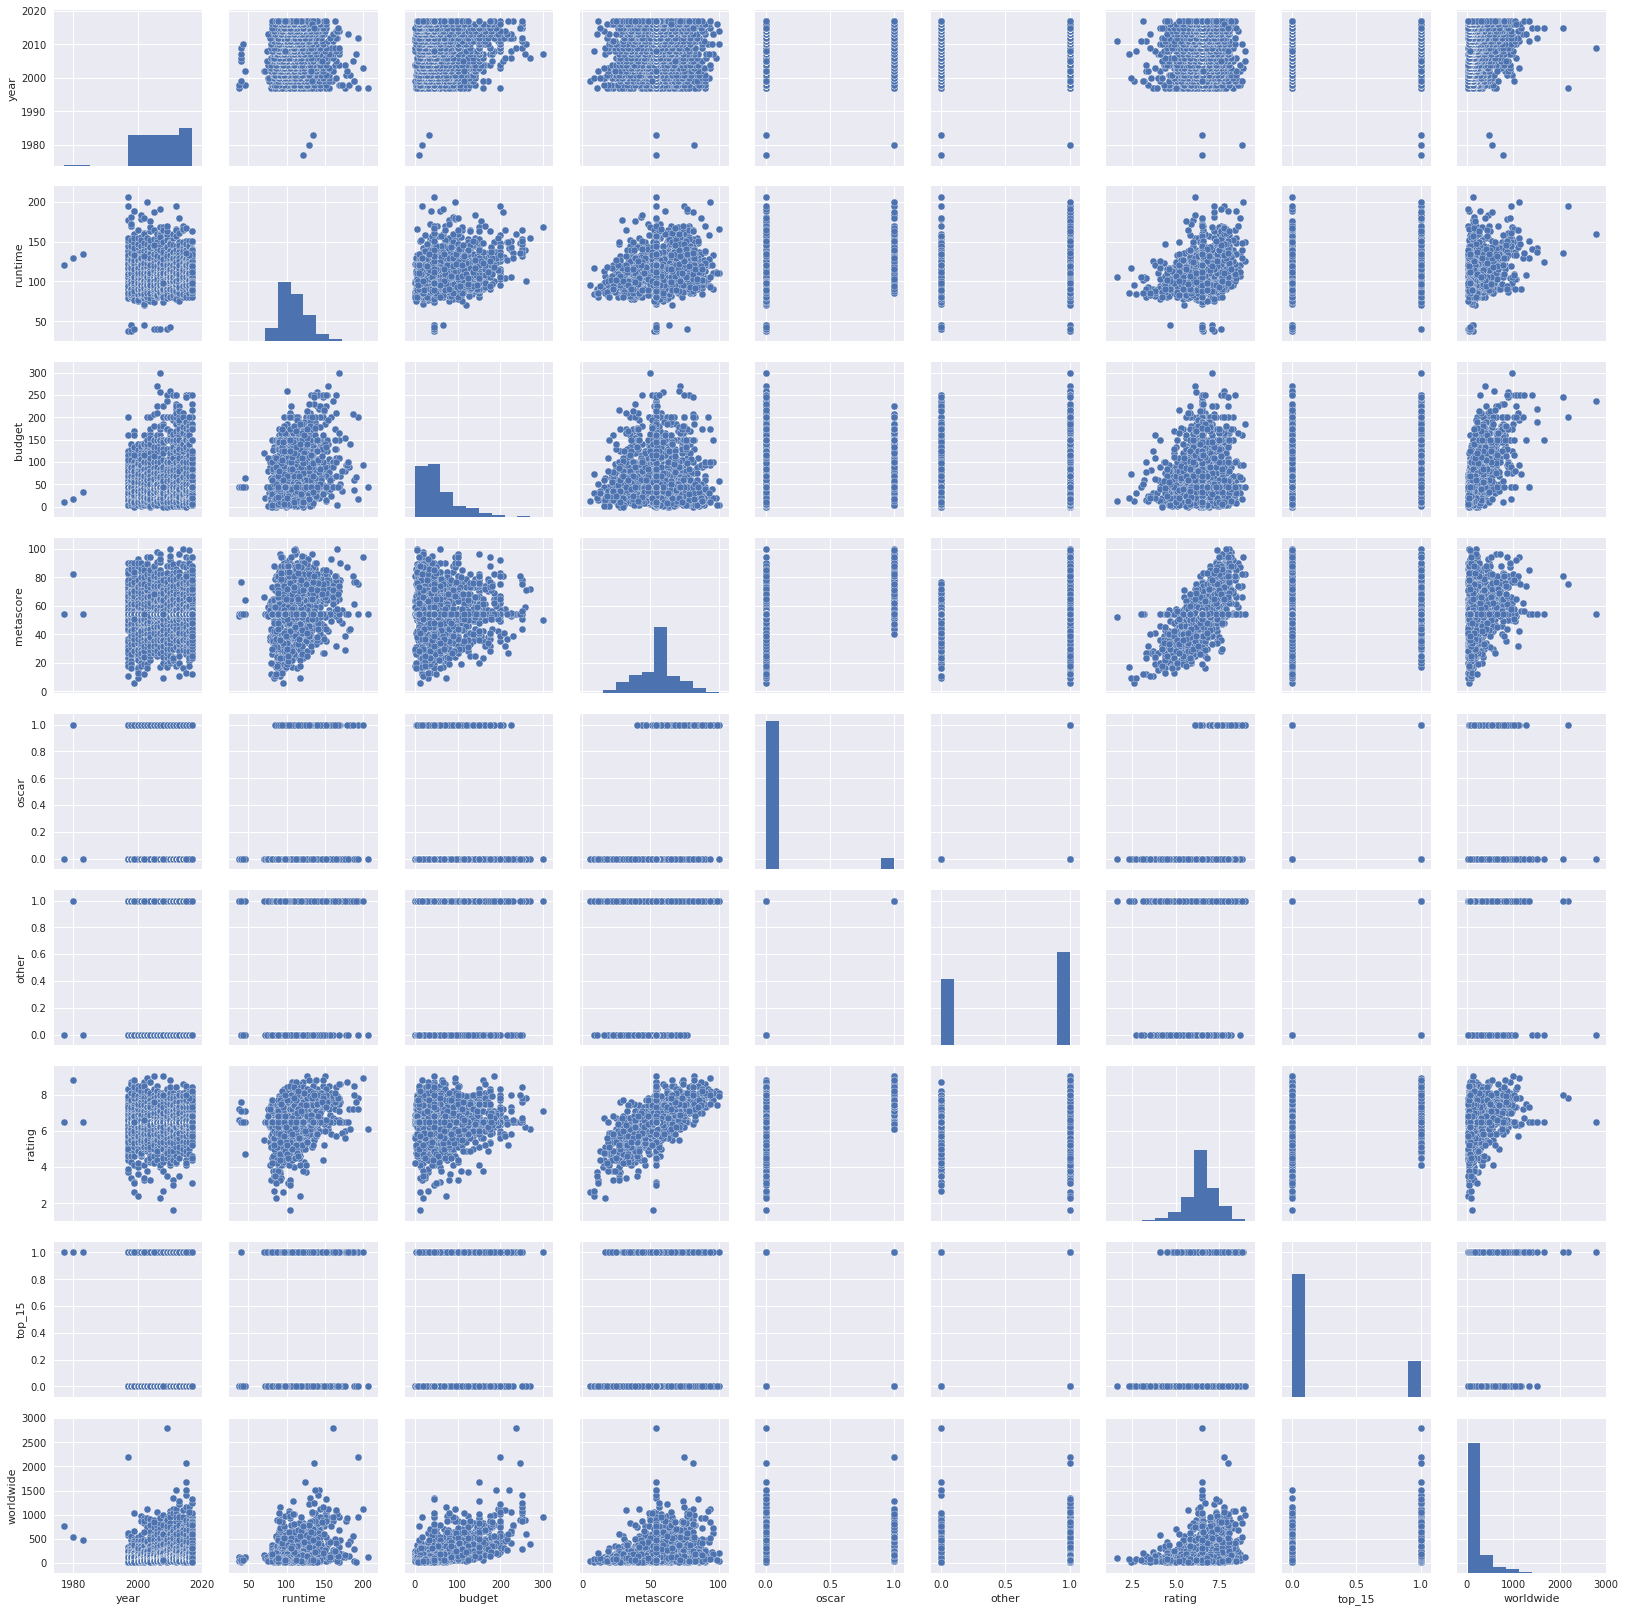

In [399]:
sns.pairplot(small)

In [9]:
# Adding degree 2 Polynomial features
def add_square_terms(df):    
    
    df_poly = df.copy()
    
    for c in df.columns:
        df_poly[c + '**2'] = df[c]**2
        
    return df_poly

In [10]:
from sklearn.metrics import mean_squared_error

def RMSE(actual, predicted):
    return np.sqrt(mean_squared_error(actual,predicted))   

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=3)

lm = LinearRegression()
lm.fit((X_train), y_train)
print('OLS regression score val R^2: %.3f' % lm.score((X_val), y_val))
print('OLS regression score val RMSE: %.3f \n' % RMSE(lm.predict((X_val)), y_val))

lm.fit(add_square_terms(X_train), y_train)
print('Degree 2 polynomial regression val R^2: %.3f' 
      % lm.score(add_square_terms(X_val), y_val))
print('Degree 2 polynomial regression score val RMSE: %.3f' 
      % RMSE(lm.predict(add_square_terms(X_val)), y_val))

OLS regression score val R^2: 0.559
OLS regression score val RMSE: 149.304 

Degree 2 polynomial regression val R^2: 0.632
Degree 2 polynomial regression score val RMSE: 136.390


In [12]:
dict(zip(add_square_terms(X_train).columns, lm.coef_))

{'year': -1887.5594622533677,
 'runtime': -5.506390818904508,
 'budget': 1.4265617116458773,
 'rating': -67.56232453986931,
 'oscar': 25.744756903412828,
 'other': 3.4004087285966373,
 'metascore': 1.571580333998213,
 'top_15': 22.643502699276507,
 'year**2': 0.4712552856111255,
 'runtime**2': 0.026185310656563095,
 'budget**2': 0.00646388884730562,
 'rating**2': 6.9770757680126305,
 'oscar**2': 25.744756901324212,
 'other**2': 3.400408728561025,
 'metascore**2': -0.007223046981425233,
 'top_15**2': 22.64350269927063}

In [13]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=1800, max_features=3)
rf.fit(add_square_terms(X_train), y_train)
rf.score(add_square_terms(X_val), y_val)

0.6009466749985186

In [14]:
RMSE(rf.predict(add_square_terms(X_val)),y_val)

142.0620962365019

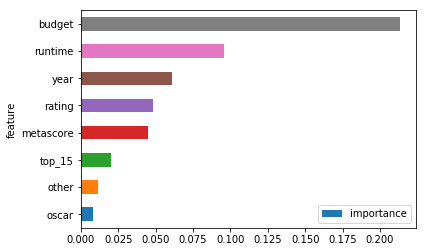

In [15]:
# Plot Feature importance to the model 
feat_imps = list(zip(X_train.columns,rf.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')

In [16]:
# CV for various models
models = {}
models['lin_reg'] = linear_model.LinearRegression()
models['ridge'] = linear_model.Ridge()
models['lasso'] = linear_model.Lasso()
models['elasticnet'] = linear_model.ElasticNet()

In [17]:
for name,model in models.items():
    model.fit(add_square_terms(X_train),y_train)
    print('Model: '+name)
    print("Score: " + str(model.score(add_square_terms(X_val),y_val)))
    sorted_features = sorted(zip(X.columns.values,model.coef_), key=lambda tup: abs(tup[1]), reverse=True)
    for feature in sorted_features:
        print(feature)
        
    print("")
    

Model: lin_reg
Score: 0.6321790602103883
('year', -1887.5594622533677)
('rating', -67.56232453986931)
('oscar', 25.744756903412828)
('top_15', 22.643502699276507)
('runtime', -5.506390818904508)
('other', 3.4004087285966373)
('metascore', 1.571580333998213)
('budget', 1.4265617116458773)

Model: ridge
Score: 0.621974299288191
('year', -250.18306683764388)
('rating', -58.57766919477012)
('oscar', 24.646486545943155)
('top_15', 22.761164073185498)
('runtime', -5.313960974984937)
('other', 3.883529106860614)
('budget', 1.390995947615963)
('metascore', 1.276260021794269)

Model: lasso
Score: 0.6174362369307751
('top_15', 39.45755698681429)
('oscar', 30.025515060153687)
('runtime', -5.288668109395713)
('other', 5.118492297159398)
('budget', 1.398118750040795)
('metascore', -0.22512983045241328)
('year', -0.0)
('rating', -0.0)

Model: elasticnet
Score: 0.61630341714543
('top_15', 8.278411328832632)
('runtime', -5.085897552406896)
('oscar', 3.1277660533920497)
('other', 1.9491205557311393)
('

(0, 2000)

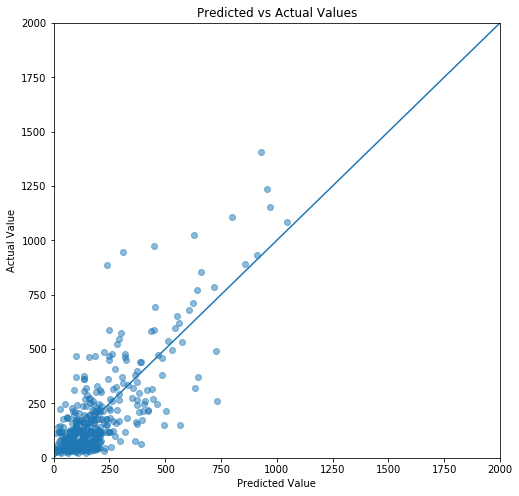

In [21]:
# Plot Actual vs Predicted
linear = linear_model.LinearRegression()

shuffler = cross_validation.ShuffleSplit(len(add_square_terms(X_train)), n_iter=5, test_size=.2, random_state = 40)

score = cross_validation.cross_val_score(linear, add_square_terms(X_train), y_train, n_jobs=1, cv=shuffler)
results = linear.fit(add_square_terms(X_train), y_train)



y_predict = linear.predict(add_square_terms(X_val))

plt.figure(figsize=(8,8))
plt.scatter(y_predict, y_val, alpha = 0.5)
straight = np.linspace(0,3000,10)
plt.plot(straight,straight)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Predicted vs Actual Values')
plt.xlim([0,2000])
plt.ylim([0,2000])

Text(0,0.5,'Residual')

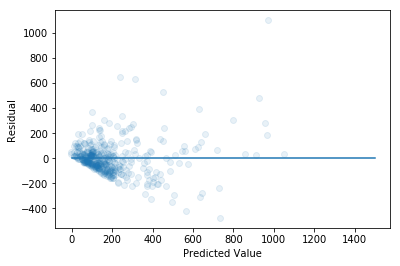

In [22]:
# Plot residuals
y_pred = lm.predict(add_square_terms(X_val))

plt.scatter(y_pred,y_val-y_pred,alpha=.1)
plt.plot(np.linspace(0,1500,1000),np.linspace(0,0,1000))
plt.xlabel('Predicted Value')
plt.ylabel('Residual')